# Data Pre-processing


In [5]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plotting
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
df = pd.read_csv("auto-mpg.data",header=None, delim_whitespace=True)
df = df.rename(columns={0: 'mpg', 1: 'cylinders', 2: 'displacement', 3: 'horsepower',
                        4: 'weight', 5: 'acceleration', 6: 'model year', 7: 'origin',
                        8: 'car name'})


print("\nNumber of unique cars in the dataset = ",len(df['car name'].unique()))
print("Total number of attributes in the dataset = ",len(df.columns))


Number of unique cars in the dataset =  305
Total number of attributes in the dataset =  9


In [19]:
cars=df['car name']
mpg=df['mpg']
distinctCarCompanies=[]
for i in cars:
    i=i.split(" ")
    if i[0] not in distinctCarCompanies:
        distinctCarCompanies.append(i[0])
       
print("\nNumber of distinct car companies =",len(distinctCarCompanies))
print("The car with the best mpg is",df.loc[df['mpg'] == mpg.max(),'car name'].iloc[0],
      "and its mpg is",mpg.max())


Number of distinct car companies = 37
The car with the best mpg is mazda glc and its mpg is 46.6


In [20]:
eight_cylinders_cars=df.loc[df['cylinders'] == 8, 'car name']
eight_cylinders_car_companies=[]
for i in eight_cylinders_cars:
    i=i.split(" ")
    eight_cylinders_car_companies.append(i[0])

counter = 0
frequent_car_company = eight_cylinders_car_companies[0]  
for i in eight_cylinders_car_companies:
    curr_frequency = eight_cylinders_car_companies.count(i)
    if(curr_frequency> counter):
       counter = curr_frequency
       frequent_car_company = i

print("The car company which produced most 8-cylinder cars is",
      frequent_car_company)
three_cylinders=df.loc[df['cylinders'] == 3, 'car name'].tolist()
print("The names of cars with three cylinders are",', '.join(three_cylinders))
print()

The car company which produced most 8-cylinder cars is ford
The names of cars with three cylinders are mazda rx2 coupe, maxda rx3, mazda rx-4, mazda rx-7 gs



In [21]:
df['horsepower'] = df['horsepower'].apply(lambda x: float(x.replace('?','NaN')))
print(df.describe(percentiles=[0.5])[1:])
print()

mpg  cylinders  displacement  horsepower       weight  \
mean  23.514573   5.454774    193.425879  104.469388  2970.424623   
std    7.815984   1.701004    104.269838   38.491160   846.841774   
min    9.000000   3.000000     68.000000   46.000000  1613.000000   
50%   23.000000   4.000000    148.500000   93.500000  2803.500000   
max   46.600000   8.000000    455.000000  230.000000  5140.000000   

      acceleration  model year    origin  
mean     15.568090   76.010050  1.572864  
std       2.757689    3.697627  0.802055  
min       8.000000   70.000000  1.000000  
50%      15.500000   76.000000  1.000000  
max      24.800000   82.000000  3.000000  



The histograms of the attributes are given below:


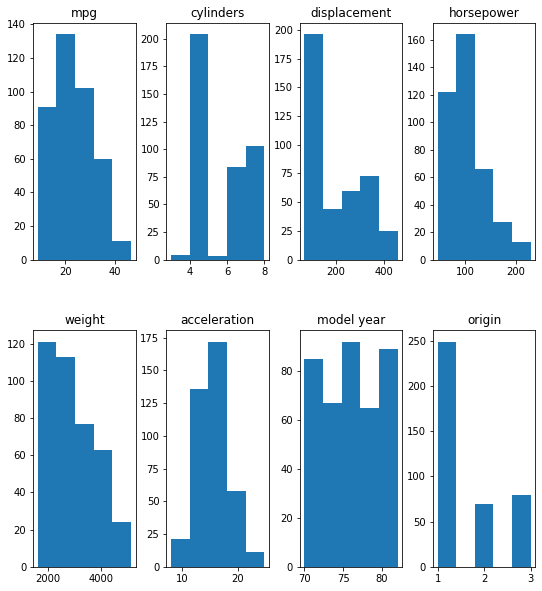

In [22]:
print("The histograms of the attributes are given below:")
df.hist(bins=5,grid=False,layout=[2,4],figsize=[9,10])
plotting.show()
print()

The scatterplot of weight vs mpg is given below:


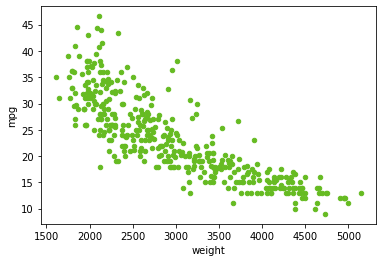


The correlation coefficient between weight and mpg is -0.8317409332443352


In [31]:
print("The scatterplot of weight vs mpg is given below:")
df.plot.scatter(x='weight', y='mpg', c='#6B2')
plotting.show()
print("\nThe correlation coefficient between weight and mpg is",
      df['weight'].corr(df['mpg']))


BEFORE ADDING RANDOM NOISE
The scatterplot of model year vs cylinders is given below:


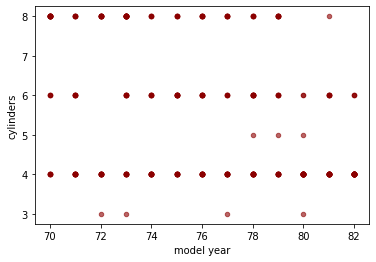

In [34]:
print("\nBEFORE ADDING RANDOM NOISE")
print("The scatterplot of model year vs cylinders is given below:")
df.plot.scatter(x='model year', y='cylinders', c='DarkRed',alpha=0.6)
plotting.show()


AFTER ADDING RANDOM NOISE
The scatterplot of model year vs cylinders is given below:


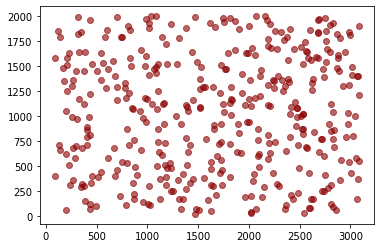

In [37]:
cylinders=list(df['cylinders'])
modelyear=list(df['model year'])

for i in range(len(cylinders)):
    cylinders[i]+=random.randint(0,1000)*2+10
    modelyear[i]+=random.randint(0,1000)*3+15
   
   
print("\nAFTER ADDING RANDOM NOISE")
print("The scatterplot of model year vs cylinders is given below:")
plotting.scatter(modelyear,cylinders, c='DarkRed',alpha=0.6)
plotting.show()
print()

The scatterplot of horsepower vs acceleration is given below:


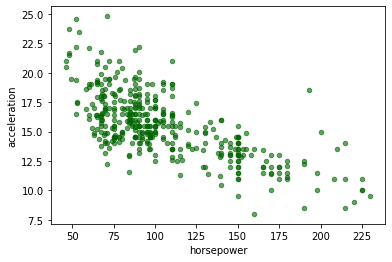


The scatterplot of displacement vs weight is given below:


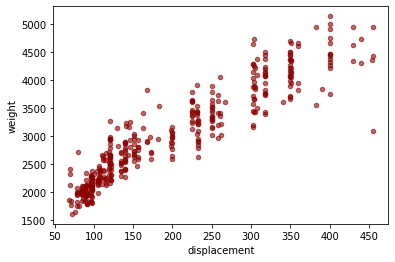

In [40]:

print("The scatterplot of horsepower vs acceleration is given below:")
df.plot.scatter(x='horsepower', y='acceleration', c='DarkGreen',alpha=0.6)
plotting.show()
print()

print("The scatterplot of displacement vs weight is given below:")
df.plot.scatter(x='displacement', y='weight', c='DarkRed',alpha=0.6)
plotting.show()

The time series plot between years and number of cars produced is shown below:


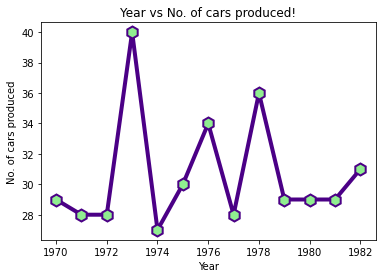

In [45]:
dictValues = {}
for i in df['model year']:
    if i not in dictValues.keys():
        newCars = df.loc[df['model year'] == i, 'car name']
        i+=1900
        dictValues[i]=newCars.shape[0]

x=list(dictValues.keys())
y=list(dictValues.values())

print("The time series plot between years and number of cars produced is shown below:")
plotting.plot(x, y, color='#4b0086', linewidth=4, marker='h', markerfacecolor='lightgreen',
              markeredgewidth=2, markersize=12)
plotting.xlabel('Year')  
plotting.ylabel('No. of cars produced')  
plotting.title('Year vs No. of cars produced!')
plotting.show()

The correlation heatmap is shown below:


Text(0.5, 1.0, 'Correlation heatmap')

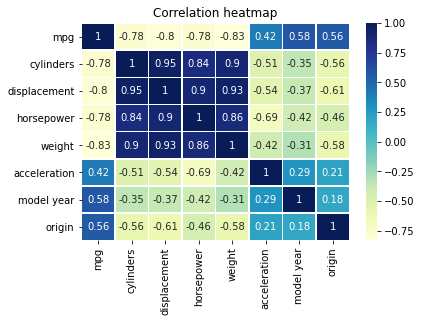

In [47]:
print("The correlation heatmap is shown below:")
correlation = df.corr()
heatmap = sns.heatmap(correlation, cbar=True, annot=True, cmap="YlGnBu", linewidths=.5)
heatmap.set_title("Correlation heatmap")